In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer          # for making transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline   # pipeline
from sklearn.feature_selection import SelectKBest,chi2       # for feature selection
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Let's Plan

In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [6]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [7]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [8]:
y_train.sample(5)

552    0
592    0
571    1
105    0
838    1
Name: Survived, dtype: int64

In [79]:
# imputation transformer - handling missing value
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])  # we are passing index
],remainder='passthrough')


In [80]:
# one hot encoding -- handling categorical variables
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])  # here als0
],remainder='passthrough')

In [81]:
# Scaling ---- 
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))  # here we are scaling all columns 
])


In [82]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)   # selecting top 8 features

In [83]:
# train the model
trf5 = DecisionTreeClassifier()

# Create Pipeline

In [99]:
# do not apply this -- benefit while exploring , find bast param using gridsearch cv
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

# Pipeline Vs make_pipeline

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [84]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [100]:
# train
pipe.fit(X_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_age', ...), ('impute_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Explore the Pipeline

In [38]:
# getting mean of impute_age attribute /object of transformer 1
pipe.named_steps['columntransformer-1']['impute_age'].statistics_  #--- for make_pipeline

array([29.49884615])

In [39]:
# getting most frequent of impute_embarked attribute /object of transformer 1
pipe.named_steps['columntransformer-1']['impute_embarked'].statistics_

array(['S'], dtype=object)

In [48]:
pipe.named_steps['columntransformer-2']['ohe_sex_embarked'].categories_

[array(['C', 'Q', 'S'], dtype=object),
 array([0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.8583, 6.95,
        6.975, 7.05, 7.0542, 7.125, 7.1417, 7.225, 7.2292, 7.25, 7.3125,
        7.4958, 7.5208, 7.55, 7.6292, 7.65, 7.725, 7.7333, 7.7375, 7.7417,
        7.75, 7.775, 7.7958, 7.8, 7.8292, 7.8542, 7.8792, 7.8875, 7.8958,
        7.925, 8.0292, 8.05, 8.1125, 8.1375, 8.3, 8.3625, 8.4042, 8.5167,
        8.6542, 8.6625, 8.6833, 8.85, 9.0, 9.2167, 9.35, 9.475, 9.4833,
        9.5, 9.5875, 9.825, 9.8375, 9.8417, 10.1708, 10.4625, 10.5,
        10.5167, 11.1333, 11.2417, 11.5, 12.0, 12.275, 12.2875, 12.35,
        12.475, 12.525, 12.65, 13.0, 13.4167, 13.5, 13.7917, 13.8583,
        13.8625, 14.0, 14.1083, 14.4, 14.4542, 14.4583, 14.5, 15.0,
        15.0458, 15.05, 15.1, 15.2458, 15.5, 15.7417, 15.75, 15.85, 15.9,
        16.0, 16.1, 16.7, 17.4, 17.8, 18.0, 18.75, 18.7875, 19.2583, 19.5,
        19.9667, 20.2125, 20.25, 20.525, 20.575, 21.0, 21.075, 21.6792,
        22.025, 22.

In [57]:
pipe.named_steps['columntransformer-3']['scale'].feature_range

(0, 1)

In [124]:
pipe.named_steps['trf5']

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


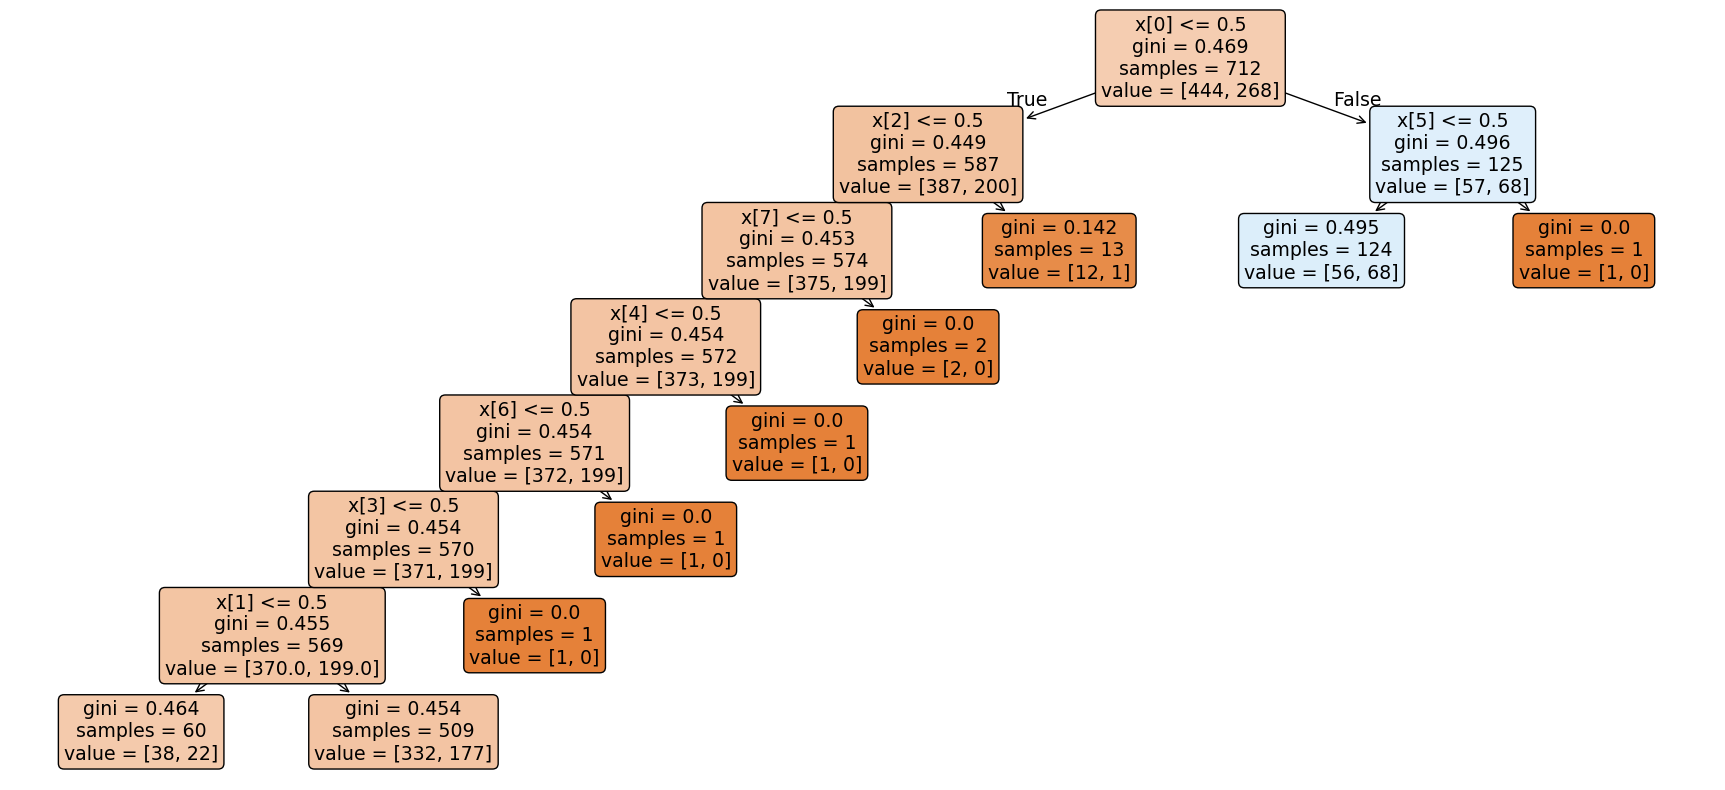

In [129]:
# plotting tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 10))
tree.plot_tree(
    pipe.named_steps['trf5'],                          # your fitted DecisionTreeClassifier
    filled=True,                 # color-coded nodes
    rounded=True,                # polished node geometry
)
plt.show()

In [101]:
# Predict
y_pred = pipe.predict(X_test)

In [102]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [103]:
from sklearn.metrics import accuracy_score  # feature selection is decreasing the accuracay
accuracy_score(y_test,y_pred)

0.6256983240223464

# Cross Validation using Pipeline

In [104]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_v_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print(cross_v_score)
print(cross_v_score.mean())

[0.6013986  0.62237762 0.68309859 0.65492958 0.63380282]
0.6391214419383433


# GridSearch using Pipeline

In [105]:
# finading the optimal depth of decision tree and ccp_alpha(prunning constant) using grid search

In [117]:
# gridsearchcv
params = {
   # 'trf5__max_depth':[1,2,3,4,5,None],
   # 'trf5__ccp_alpha':[0,0.1,0.01,0.001] --- error beacuse we made pipeline using make_pipeline so we havnt provided name of transformer
   'trf5__max_depth':[1,2,3,4,5,None],
   # 'trf5__ccp_alpha':[0.1,0.01,0.001] --- it doesn't effecting our tree
}

In [118]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'trf5__max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('impute_age', ...), ('impute_embarked', ...)]"


In [135]:
grid.best_score_

np.float64(0.6391214419383433)

In [136]:
grid.best_params_

{'trf5__max_depth': 2}

# Exporting the Pipeline

In [137]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))